<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_11_Training_Deep_Neural_Networks_Part_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the Fashion MNIST Dataset
# Loading dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Check shapes
X_train_full.shape, X_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [4]:
# Creating Training and Validation Sets
# Using first 5,000 images for validation
# Split validation set
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]

X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [5]:
# Reshaping and Standardizing the Data
# Standardization using StandardScaler
# Reshaping to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
# Helper Function to Plot Learning Curves
def plot_learning_curves(history, title):
    plt.figure(figsize=(8,5))
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
# Deep Neural Network with ReLU
# Building DNN with ReLU Activation
model_relu = keras.Sequential()
model_relu.add(layers.InputLayer(input_shape=(784,)))

# The 20 hidden layers
for _ in range(20):
    model_relu.add(layers.Dense(100, activation="relu"))

# Output layer
model_relu.add(layers.Dense(10, activation="softmax"))

# Compiling the model
model_relu.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"]
)

model_relu.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,410 (1.04 MB)

 Trainable params: 271,410 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the ReLU Model
history_relu = model_relu.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    batch_size=32
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1311 - loss: 2.3023 - val_accuracy: 0.2126 - val_loss: 2.3014
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1878 - loss: 2.3009 - val_accuracy: 0.1890 - val_loss: 2.2975
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1998 - loss: 2.2957 - val_accuracy: 0.2206 - val_loss: 2.2856
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.1919 - loss: 2.2811 - val_accuracy: 0.1988 - val_loss: 2.2561
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1891 - loss: 2.2437 - val_accuracy: 0.2030 - val_loss: 2.1740
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.1888 - loss: 2.1346 - val_accuracy: 0.2040 - val_loss: 1.9421
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.2001 - loss: 1.8756 - val_accuracy: 0.2776 - val_loss: 1.6998
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.2814 - lo

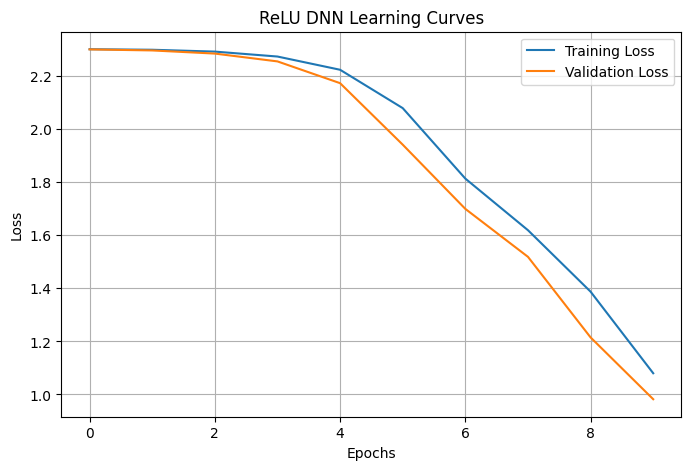

In [10]:
# Plotting the Learning Curves
plot_learning_curves(history_relu, "ReLU DNN Learning Curves")

Observations had:
•	Training is slow
•	Risk of vanishing/exploding gradients
•	Validation accuracy improves slowly


In [11]:
# Adding Batch Normalization
# Building the Model with Batch Normalization
model_bn = keras.Sequential()
model_bn.add(layers.InputLayer(input_shape=(784,)))

for _ in range(20):
    model_bn.add(layers.Dense(100, use_bias=False))
    model_bn.add(layers.BatchNormalization())
    model_bn.add(layers.Activation("relu"))

model_bn.add(layers.Dense(10, activation="softmax"))

model_bn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"]
)

model_bn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 277,410 (1.06 MB)

 Trainable params: 273,410 (1.04 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [12]:
# Training BN Model
history_bn = model_bn.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid),
    batch_size=32
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.1803 - loss: 2.3114 - val_accuracy: 0.6042 - val_loss: 1.2307
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5728 - loss: 1.2797 - val_accuracy: 0.7242 - val_loss: 0.8019
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6568 - loss: 1.0093 - val_accuracy: 0.7574 - val_loss: 0.6952
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6933 - loss: 0.8965 - val_accuracy: 0.7768 - val_loss: 0.6313
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7105 - loss: 0.8306 - val_accuracy: 0.7914 - val_loss: 0.5901


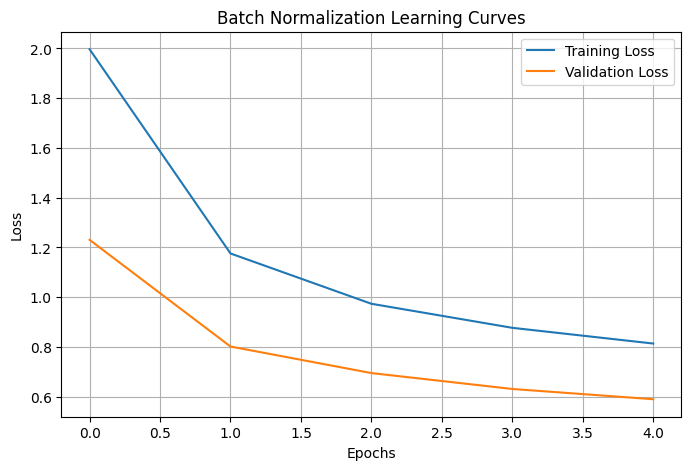

In [13]:
# Plotting BN Learning Curves
plot_learning_curves(history_bn, "Batch Normalization Learning Curves")

Answers to the questions:
•	BN speeds up convergence
•	Higher validation accuracy
•	Training is more stable

In [14]:
# Replacing BN with SELU
# Building SELU-Based Model
model_selu = keras.Sequential()
model_selu.add(layers.InputLayer(input_shape=(784,)))

for _ in range(20):
    model_selu.add(layers.Dense(
        100,
        activation="selu",
        kernel_initializer="lecun_normal"
    ))

model_selu.add(layers.Dense(10, activation="softmax"))

model_selu.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"]
)

model_selu.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,410 (1.04 MB)

 Trainable params: 271,410 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Training SELU Model
history_selu = model_selu.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid),
    batch_size=32
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6825 - loss: 0.9006 - val_accuracy: 0.8218 - val_loss: 0.5045
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8315 - loss: 0.4758 - val_accuracy: 0.8474 - val_loss: 0.4422
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8516 - loss: 0.4117 - val_accuracy: 0.8554 - val_loss: 0.4170
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8632 - loss: 0.3741 - val_accuracy: 0.8602 - val_loss: 0.3954
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8738 - loss: 0.3474 - val_accuracy: 0.8654 - val_loss: 0.3876


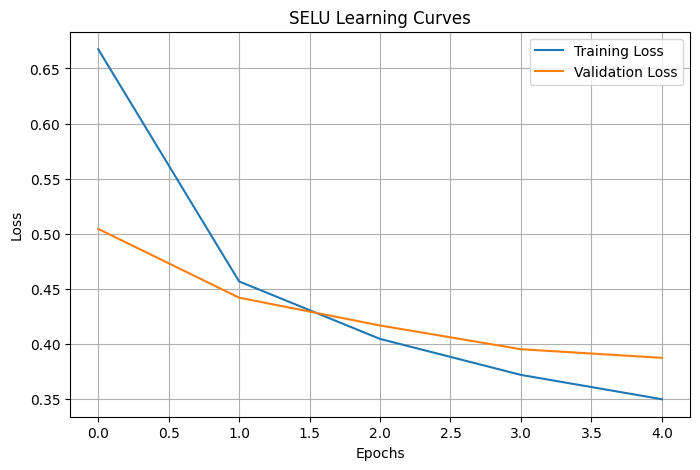

In [16]:
# Plotting SELU Learning Curves
plot_learning_curves(history_selu, "SELU Learning Curves")

Answers to the questions:
•	SELU self-normalizes
•	Faster than plain ReLU
•	Slightly slower than BN but simpler architecture

In [17]:
# Adding Dropout to Reduce Overfitting
# Continue Training Without Dropout
history_selu_extra = model_selu.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid),
    batch_size=32
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8789 - loss: 0.3338 - val_accuracy: 0.8668 - val_loss: 0.3758
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8869 - loss: 0.3164 - val_accuracy: 0.8706 - val_loss: 0.3725
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8916 - loss: 0.3038 - val_accuracy: 0.8724 - val_loss: 0.3669
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8943 - loss: 0.2934 - val_accuracy: 0.8722 - val_loss: 0.3636
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8952 - loss: 0.2853 - val_accuracy: 0.8790 - val_loss: 0.3535


In [18]:
# Building SELU Model with Dropout
model_selu_dropout = keras.Sequential()
model_selu_dropout.add(layers.InputLayer(input_shape=(784,)))

for _ in range(20):
    model_selu_dropout.add(layers.Dense(
        100,
        activation="selu",
        kernel_initializer="lecun_normal"
    ))

# Dropout before output
model_selu_dropout.add(layers.Dropout(0.5))
model_selu_dropout.add(layers.Dense(10, activation="softmax"))

model_selu_dropout.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"]
)

model_selu_dropout.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,410 (1.04 MB)

 Trainable params: 271,410 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Training Dropout Model
history_dropout = model_selu_dropout.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid),
    batch_size=32
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7698 - loss: 0.6843 - val_accuracy: 0.8358 - val_loss: 0.4603
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8221 - loss: 0.5230 - val_accuracy: 0.8540 - val_loss: 0.4100
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8461 - loss: 0.4524 - val_accuracy: 0.8536 - val_loss: 0.4182
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8548 - loss: 0.4162 - val_accuracy: 0.8652 - val_loss: 0.3841
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.3839 - val_accuracy: 0.8664 - val_loss: 0.3844


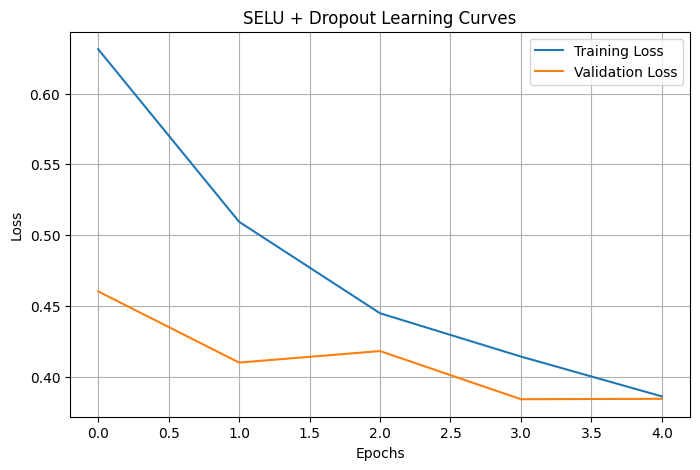

In [21]:
# Plotting Dropout Learning Curves
plot_learning_curves(history_dropout, "SELU + Dropout Learning Curves")

Final Answers and Summary:
•	Dropout reduces overfitting
•	Validation loss becomes more stable
•	Final validation accuracy improves compared to no Dropout
Best generalization achieved with SELU + Dropout